# Hotel Review 

In [3]:
#Loading libraries

import numpy as np
import pandas as pd
import seaborn as sns
import re
from collections import defaultdict,Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import textstat
from textblob import TextBlob 
from tqdm import tqdm
from statistics import *
from bidi.algorithm import get_display
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
 
import arabic_reshaper

# # for scientific computing and technical computing
# from scipy import linalg
# from scipy.stats import norm
# from scipy import stats

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
#from keras.initializers import Constant
#from keras.optimizers import Adam
#from tqdm import tqdm

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords

#from nltk.tokenize.moses import MosesDetokenizer

from farasa.pos import FarasaPOSTagger 
from farasa.ner import FarasaNamedEntityRecognizer 
from farasa.diacratizer import FarasaDiacritizer 
from farasa.segmenter import FarasaSegmenter 
from farasa.stemmer import FarasaStemmer

# Sklearn
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
plt.style.use('seaborn')
from PIL import Image

# gensim
import gensim
from gensim import corpora, models, similarities, matutils
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
tsv_file='balanced-reviews-utf8.tsv'
hotel_reviews=pd.read_table(tsv_file,sep='\t')
hotel_reviews.to_csv('new_name.csv',index=False)

hotel_reviews.head(20)

,no,Hotel name,rating,user type,room type,nights,review
0,2,فندق 72,2,مسافر منفرد,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,“ممتاز”. النظافة والطاقم متعاون.
1,3,فندق 72,5,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...
2,16,فندق 72,5,زوج,-,أقمت ليلتين,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...
3,20,فندق 72,1,زوج,غرفة قياسية مزدوجة,أقمت ليلة واحدة,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...
4,23,فندق 72,4,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلتين,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...
5,24,فندق 72,5,أسرة,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,ممتاز. موقع الفندق ونظافته والاطلاله على البحر...
6,25,فندق 72,5,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,“جيدجداً”. الافطار جيد والسرير ممتاز ومريح واط...
7,26,فندق 72,5,مسافر منفرد,-,أقمت ليلتين,“فندق ممتاز”. الاثاث، النظافه.
8,27,فندق 72,5,أسرة,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلتين,“الراحة و الهدوء”. مكان مناسب ومريح انصح به خ...
9,28,فندق 72,5,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,استثنائي. المكان روعه تحديدا الغرف المطله على ...


In [5]:
#we drop 20000
hotel_reviews.drop(hotel_reviews.index[2000:], inplace = True)

In [4]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_stopwords(text):
    stop = set(stopwords.words('arabic'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

# Applying helper functions

hotel_reviews['review'] = hotel_reviews['review'].apply(lambda x: remove_URL(x))
hotel_reviews['review'] = hotel_reviews['review'].apply(lambda x: remove_emoji(x))
hotel_reviews['review'] = hotel_reviews['review'].apply(lambda x: remove_html(x))
hotel_reviews['review'] = hotel_reviews['review'].apply(lambda x: remove_punct(x))
hotel_reviews['review'] = hotel_reviews['review'].apply(lambda x: remove_stopwords(x))


In [5]:
# Set 4/5 star reviews to positive, the rest to negative
hotel_reviews['new_rating'] = np.where(hotel_reviews['rating'] >= 4, '1', '0')

# Include only the sentiment and reviews columns
hotel_reviews2 = hotel_reviews[['new_rating', 'review']]



2021-12-29 01:33:58,236 : INFO : NumExpr defaulting to 4 threads.


In [6]:
hotel_reviews2.head()

,new_rating,review
0,0,“ ممتاز ” النظافة والطاقم متعاون
1,1,استثنائي سهولة إنهاء المعاملة الاستقبال لاشيئ
2,1,استثنائي انصح بأختيار الاسويت بالاخص غرفه رقم ...
3,0,“ استغرب تقييم الفندق كخمس نجوم ” شي يستحق 2 نجمه
4,1,جيد المكان جميل وهاديء شي جيد ونظيف حوض السباح...


In [7]:
def remove_numbers_and_latin_chars(text):
    """
    This function removes any non arabic letters from texts
    """
    
    pattern = r'[a-z A-Z 0-9 ﷺ ٠١٢٣٤٥٦٧٨٩ .: ⃣◈!@#\➘✓ /$%^&*()_+;={,-/|?><~"}]'
    new_text=re.sub(pattern, ' ',  str(text))
    return new_text


In [8]:
hotel_reviews['review']=hotel_reviews['review'].apply(remove_numbers_and_latin_chars)

In [9]:
df_review=hotel_reviews[hotel_reviews.columns[6]].astype(str)

In [10]:
df_review.head()

0                     “ ممتاز ” النظافة والطاقم متعاون
1        استثنائي سهولة إنهاء المعاملة الاستقبال لاشيئ
2    استثنائي انصح بأختيار الاسويت بالاخص غرفه رقم ...
3    “ استغرب تقييم الفندق كخمس نجوم ” شي يستحق   نجمه
4    جيد المكان جميل وهاديء شي جيد ونظيف حوض السباح...
Name: review, dtype: object

In [11]:
#load data into a DataFrame object:
dataframe=pd.DataFrame(df_review)#delete
dataframe

,review
0,“ ممتاز ” النظافة والطاقم متعاون
1,استثنائي سهولة إنهاء المعاملة الاستقبال لاشيئ
2,استثنائي انصح بأختيار الاسويت بالاخص غرفه رقم ...
3,“ استغرب تقييم الفندق كخمس نجوم ” شي يستحق نجمه
4,جيد المكان جميل وهاديء شي جيد ونظيف حوض السباح...
...,...
1995,“ جيدة ازعاج صالة الافراح بالدور التاسع ” المو...
1996,ضعيف اعمال صيانه وقت الظهر وكذلك دورات المياة ...
1997,“ فندق جميل ” اعجبني النظافه والهدؤ متوفر سبل ...
1998,ضعيف الفرش قديم جدا ودورة المياه سيئة جدا


In [12]:
df_rating = hotel_reviews[hotel_reviews.columns[0]].rename('new_rating')

In [13]:
df_rating

0          2
1          3
2         16
3         20
4         23
        ... 
1995    7284
1996    7285
1997    7286
1998    7287
1999    7290
Name: new_rating, Length: 2000, dtype: int64

In [14]:
### Selecting non alpha numeric charactes that are not spaces
spl_chars = hotel_reviews['review'].apply(lambda review: 
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

noise_sp =[]

## Unique special characters
sp = set(flat_list)
sp

{'،', '؛', '؟', 'ً', 'َ', 'ُ', 'ِ', 'ّ', '٪', '\u200f', '“', '”', '…'}

In [15]:
def remove_numbers_and_latin_chars(text):
    """
    This function removes any non arabic letters from texts
    """
    
    pattern = r'[a-z A-Z 0-9 ﷺ ٠١٢٣٤٥٦٧٨٩ .: ⃣◈!@#\➘✓ /$%^&*()_+;={,-/|?><~"}]'
    new_text=re.sub(pattern, ' ',  str(text))
    return new_text


In [16]:
dataframe['review']=dataframe['review'].apply(remove_numbers_and_latin_chars)

In [17]:
dataframe

,review
0,“ ممتاز ” النظافة والطاقم متعاون
1,استثنائي سهولة إنهاء المعاملة الاستقبال لاشيئ
2,استثنائي انصح بأختيار الاسويت بالاخص غرفه رقم ...
3,“ استغرب تقييم الفندق كخمس نجوم ” شي يستحق نجمه
4,جيد المكان جميل وهاديء شي جيد ونظيف حوض السباح...
...,...
1995,“ جيدة ازعاج صالة الافراح بالدور التاسع ” المو...
1996,ضعيف اعمال صيانه وقت الظهر وكذلك دورات المياة ...
1997,“ فندق جميل ” اعجبني النظافه والهدؤ متوفر سبل ...
1998,ضعيف الفرش قديم جدا ودورة المياه سيئة جدا


In [18]:
# Convert to list
data = dataframe[dataframe.columns[0]].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove Numbers
data = [re.sub("\d", "", sent) for sent in data]

data = [re.sub("pdf", "", sent) for sent in data]
data = [re.sub("!", "", sent) for sent in data]
data = [re.sub("؟؟", "", sent) for sent in data]
data = [re.sub("👎👎", "", sent) for sent in data]
data = [re.sub("❤", "", sent) for sent in data]
data = [re.sub("😡", "", sent) for sent in data]
data = [re.sub("😑", "", sent) for sent in data]
data = [re.sub("😉", "", sent) for sent in data]
data = [re.sub("😤", "", sent) for sent in data]
data = [re.sub("😭", "", sent) for sent in data]
data = [re.sub("😔", "", sent) for sent in data] 
data = [re.sub("✌", "", sent) for sent in data]
data = [re.sub("…", "", sent) for sent in data] 
data = [re.sub("{" , "", sent) for sent in data]
data = [re.sub("}", "", sent) for sent in data]
data = [re.sub("من", "ان", sent) for sent in data]
data = [re.sub("،" , "", sent) for sent in data] 
data = [re.sub("”" , "", sent) for sent in data]
data = [re.sub("\u200f" , "", sent) for sent in data]
data = [re.sub("," , "", sent) for sent in data]
data = [re.sub("عن", "على", sent) for sent in data] 
data = [re.sub("اذا", "لماذا", sent) for sent in data]
data = [re.sub("“", "", sent) for sent in data]
data = [re.sub("٪", "", sent) for sent in data] 
data = [re.sub("؛", "", sent) for sent in data]
data = [re.sub("،", "", sent) for sent in data]
data = [re.sub("'ً", "", sent) for sent in data]
data = [re.sub("'َ", "", sent) for sent in data]
data = [re.sub(",", "", sent) for sent in data]
data = [re.sub("ؤ", "ء", sent) for sent in data]
data = [re.sub("ئ", "ء", sent) for sent in data]
data = [re.sub("إأٱآا", "ا", sent) for sent in data]
data = [re.sub("وووو", "و", sent) for sent in data] 
data = [re.sub("ااااا", "ا", sent) for sent in data] 


print(data)

[' ممتاز  النظافة والطاقم متعاون', 'استثناءي سهولة إنهاء المعاملة الاستقبال لاشيء', 'استثناءي انصح بأختيار الاسويت بالاخص غرفه رقم نوعية الارضيه', ' استغرب تقييم الفندق كخمس نجوم  شي يستحق نجمه', 'جيد المكان جميل وهاديء شي جيد ونظيف حوض السباحه لايعمل الفتره كلامهم يقولوا صيانه والله اعلم', 'ممتاز موقع الفندق ونظافته والاطلاله البحر وجزيرة النور تحتوي الفراشات وكذلك قربه المسجد والممشى توفر المواقف بجانب الفندق وخدمة صف السيارات المسبح مغلق للصيانه المواقف تحتاج الى مظلات', ' جيدجداً  الافطار جيد والسرير ممتاز ومريح واطلالة الغرفة راءعه فرش ارضية الغرفه', ' فندق ممتاز  الاثاث النظافه', ' الراحة الهدوء  مكان اناسب ومريح انصح لموقعه الكورنيش وخدماته الممتازة شيء', 'استثناءي المكان روعه تحديدا الغرف المطله واحة النخيل الكورنيش مخداتهم الزووود', ' إقامتي فندق الشارقة  موقع الفندق ممتاز السعر مقابل الخدمات ممتاز', ' فندق الراحه  قربه الاسواق لاشي', ' أسرة اماراتية  فندق مبنى الطراز الحديث وكل الديكورات والاثاث مميز وراقي شء', 'راءع عدم تحديد الغرف مطلة البحيرة ام انني قمت بحجز غرفتين وحسب ص

In [19]:
# return an array
stemmer = FarasaStemmer()

def stemm(tweetstr):
    stemstr = []
    for s in tweetstr:
        st = stemmer.stem(s)
        stemstr.append(st)
    return stemstr

In [20]:
data = stemm(data)
data

['ممتاز نظافة طاقم متعاون',
 'استثناء سهولة إنهاء معاملة استقبال لاشيء',
 'استثناء انصح أختيار اسويت اخص غرفة رقم نوعية ارضيه',
 'استغرب تقييم فندق خمس نجم شي استحق نجم',
 'جيد مكان جميل هاديء شي جيد نظيف حوض سباحه لايعمل فتره كلام قال صيان الله اعلم',
 'ممتاز موقع فندق نظافة اطلاله بحر جزيرة نور احتوى فراشة ذلك قرب مسجد ممشى وفر موقف جانب فندق خدمة صف سيارة مسبح مغلق لصيان موقف احتاج الى مظل',
 'جيدجدا إفطار جيد سرير ممتاز مريح اطلال غرفة راءع فرش أرضية غرفة',
 'فندق ممتاز اثاث نظافه',
 'راحة هدوء مكان اناسب مريح انصح موقع كرنيش خدمة ممتاز شيء',
 'استثناء مكان روع تحديد غرفة مطله واحة نخل كرنيش مخد زووود',
 'إقامة فندق شارقة موقع فندق ممتاز سعر مقابل خدمة ممتاز',
 'فندق راحه قرب سوق لاشي',
 'أسرة اماراتي فندق مبنى طراز حديث كل ديكور اثاث مميز راقي شء',
 'راءع عدم تحديد غرفة مطل بحيرة ام انني قام حجز غرفة حسب صورة غرفة ان مطل بحيرة علىد وصول فندق اخبروني باني إحدى غرفة مطل',
 'مريح هدوء',
 'ممتاز واي فاي ضعيف جد',
 'جيد شي جميل حجم غرفة',
 'موظف مسبح سيء جد موظف مسبح سيء جدامعظم وقت مس

In [22]:
d = {'rating': df_rating, 'review1': data}

In [23]:
df_final =pd.DataFrame(data = d)

In [24]:
df_final

,rating,review1
0,2,ممتاز نظافة طاقم متعاون
1,3,استثناء سهولة إنهاء معاملة استقبال لاشيء
2,16,استثناء انصح أختيار اسويت اخص غرفة رقم نوعية ا...
3,20,استغرب تقييم فندق خمس نجم شي استحق نجم
4,23,جيد مكان جميل هاديء شي جيد نظيف حوض سباحه لايع...
...,...,...
1995,7284,جيد ازعاج صالة فرح دور تاسع موقع قريب بلد سوق ...
1996,7285,ضعيف أعمال صيان وقت ظهر ذلك دورة ميا مهترء جد جد
1997,7286,فندق جميل اعجبني نظافه هدء متوفر سبيل راحه شي ...
1998,7287,ضعيف فرش قديم جد دورة ماء سيء جد


In [ ]:
df_final.to_csv('GFG.csv')

WoordCloud

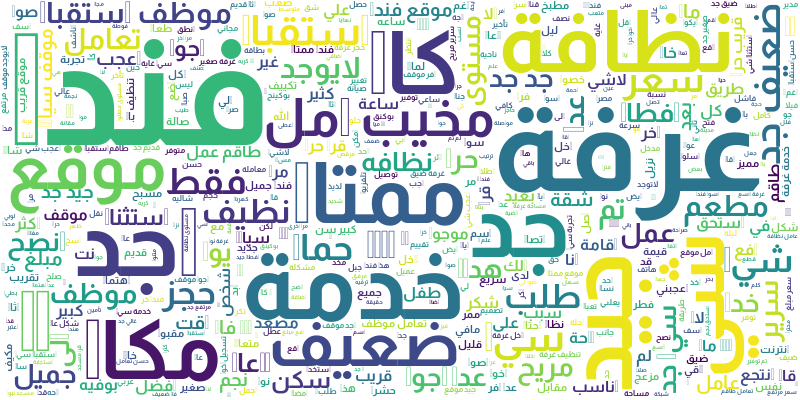

In [48]:
from ar_wordcloud import ArabicWordCloud
import matplotlib as mpl
import arabic_reshaper # this was missing in your code



long_string = ','.join(list(df_final['review1'].values))
data = arabic_reshaper.reshape(long_string)
data = get_display(data) # add this line
wordcloud =  WordCloud(font_path= 'C:\\Users\\hp\Documents\\Almarai-Bold.ttf',background_color="white", max_words=500, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(data)
wordcloud.to_image()

In [ ]:
! pip install pyarabic

In [115]:
run_wordcloud = True
max_data_size = None #for modeling

In [116]:
def plot_wordcloud(wordcloud):
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

def wordcloud_from_sentences(sentences):
    comment_words = '' 
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in sentences: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "
        data = arabic_reshaper.reshape(comment_words)
        data = get_display(data) # add this line
       

    wordcloud = WordCloud(
        width = 800, 
        height = 800, 
        background_color ='white',
        font_path= 'C:\\Users\\hp\Documents\\Almarai-Bold.ttf',
        stopwords = stopwords, 
        min_font_size = 10 ).generate(data)
    
    plot_wordcloud(wordcloud=wordcloud)

    wordcloud.to_image()
    






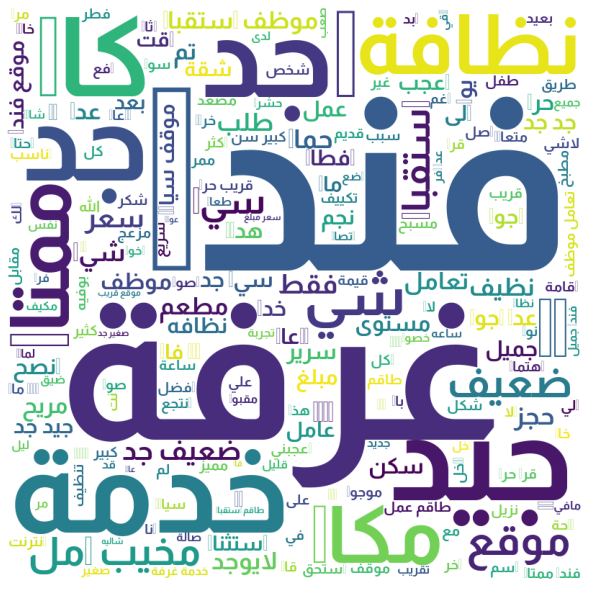

In [117]:
# wordcloud with all reviews
if run_wordcloud:
    wordcloud_from_sentences(sentences=df_final.review1)

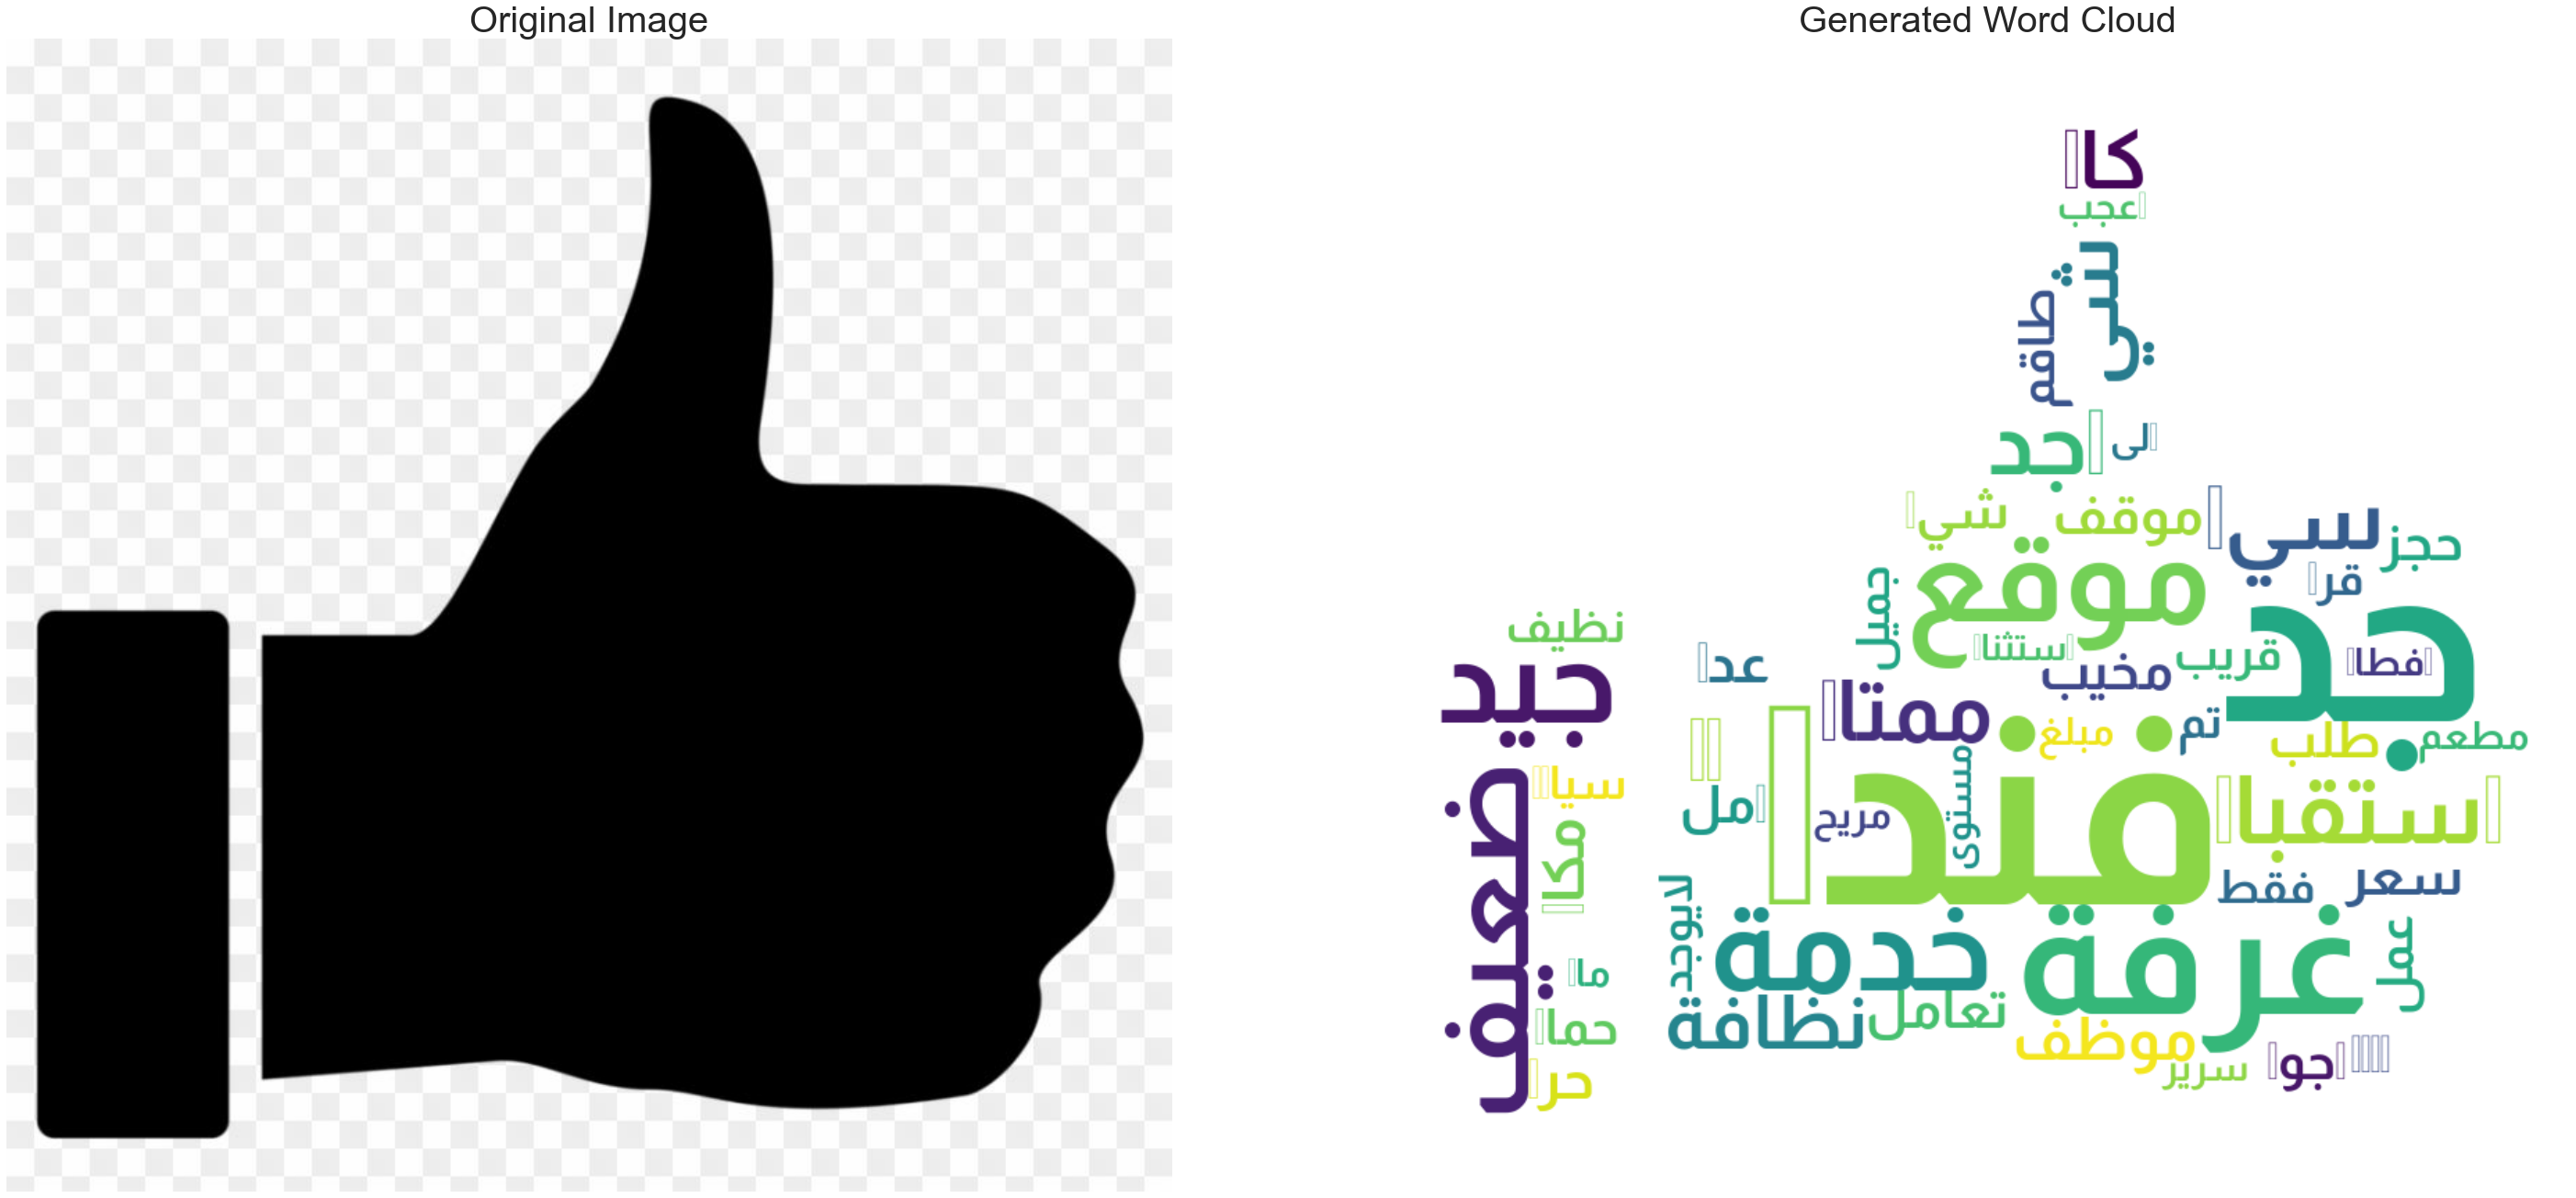

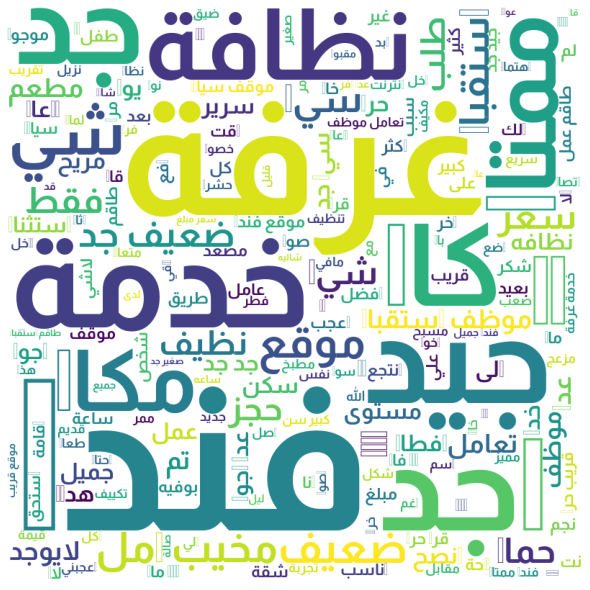

In [161]:
mask = np.array(Image.open('./df19050fd3ff5fc3fcf1da5d45d2fbc6.jpg'))
wordcloud = WordCloud(width=1600, font_path= 'C:\\Users\\hp\Documents\\Almarai-Bold.ttf', mask =   mask, background_color='white',height=800,max_font_size=200,max_words=50,collocations=False).generate(data)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Image', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Generated Word Cloud', size=40)
plt.axis("off")
plt.show()
if run_wordcloud:
    df_good_review = df_final[df_final['rating'] == 1]
    wordcloud_from_sentences(sentences=df_final.review1)

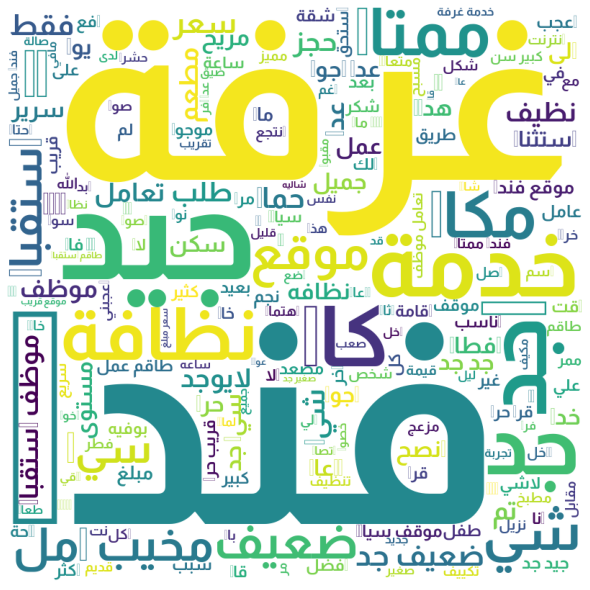

In [122]:
if run_wordcloud:
    df_good_review = df_final[df_final['rating'] == 1]
    wordcloud_from_sentences(sentences=df_final.review1)

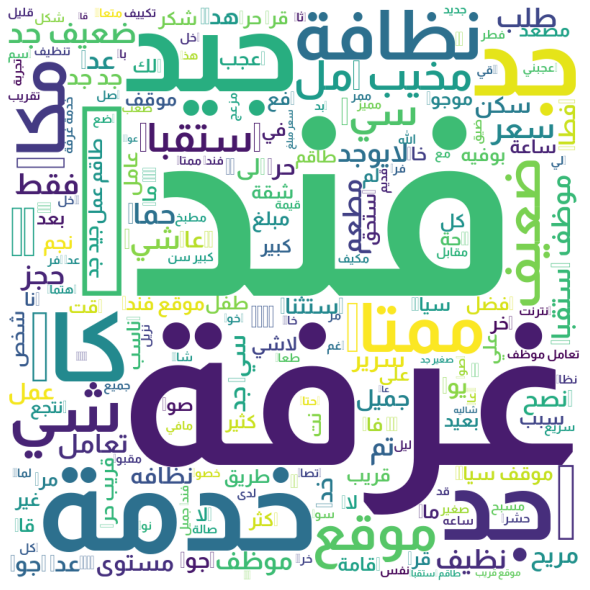

In [123]:
if run_wordcloud:
    df_bad_review = df_final[df_final['rating'] == 0]
    wordcloud_from_sentences(sentences=df_final.review1)

# Topic Modling

In [25]:
#1
vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(df_final['review1'])
doc_word.shape

(2000, 5771)

In [26]:
# Materialize the sparse data
data_dense = doc_word.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.2994541673886675 %


# Build LDA model using Sklearn

In [27]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(doc_word)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


In [28]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(doc_word))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(doc_word))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -291359.25680084486
Perplexity:  1749.8821582490841
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


# Tune number of topics and learning decay (controls learning rate) using GridSearchCV

In [30]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(doc_word)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

# Get the params of the best model

In [31]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(doc_word))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -85474.01676663445
Model Perplexity:  1712.9856889318824


# View the dominant topic probability in each document

In [32]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(doc_word)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df_final))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.820000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0
Doc1,0.280000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.610000,0.010000,8
Doc2,0.010000,0.010000,0.010000,0.010000,0.010000,0.450000,0.010000,0.470000,0.010000,0.010000,7
Doc3,0.900000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0
Doc4,0.010000,0.010000,0.010000,0.010000,0.010000,0.950000,0.010000,0.010000,0.010000,0.010000,5
Doc5,0.460000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
Doc6,0.750000,0.010000,0.010000,0.010000,0.010000,0.010000,0.190000,0.010000,0.010000,0.010000,0
Doc7,0.820000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0
Doc8,0.920000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0
Doc9,0.760000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.170000,0


# Topic - doc distribution

In [33]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,622
1,7,315
2,5,254
3,3,163
4,1,154
5,9,134
6,4,132
7,6,123
8,2,68
9,8,35


# Visualize the top words per topic (their overall frequency in the original doc vs their frequency in the topic)¶

In [34]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, doc_word, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  22.602177
7       0.648955  71.707100       2        1  12.476613
1      71.019684   9.971006       3        1  11.838594
3       3.785981  33.185135       4        1  10.331473
4     -42.666500  -9.222070       5        1   9.854993
6      -3.621689 -43.526516       6        1   9.609115
5      -3.632402  -4.171708       7        1   9.574273
9     -36.584400  35.804413       8        1   7.093739
2      44.391380  50.615383       9        1   4.362966
8      40.235809 -31.591665      10        1   2.256058, topic_info=       Term        Freq        Total Category  logprob  loglift
278     أمل  185.000000   185.000000  Default  30.0000  30.0000
4568   مخيب  181.000000   181.000000  Default  29.0000  29.0000
1040     ان  312.000000   312.000000  Default  28.0000  28.0000
3034     شي  278.000000   278.000000  Default  27.0000  27.0000
5043  ممتاز  293.000000   293.000000  Default  26.0000  26.0000
...     ...         ...          ...      ...      ...      ...
278     أمل    3.192589   185.391176  Topic10  -5.6194  -0.2701
3723   فندق    4.090066  1150.909929  Topic10  -5.3717  -1.8482
3232   طاقم    2.855740   147.813962  Topic10  -5.7309  -0.1551
5295  نظافه    2.642266    92.585943  Topic10  -5.8086   0.2351
3596    غير    2.558321    70.378339  Topic10  -5.8409   0.4770

[800 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         2  0.770052   ءق
3         1  0.172784  آخر
3         2  0.135759  آخر
3         3  0.160442  آخر
3         4  0.086392  آخر
...     ...       ...  ...
5764      6  0.219211  يوم
5764      7  0.048713  يوم
5764      8  0.048713  يوم
5764      9  0.097427  يوم
5764     10  0.024357  يوم

[1927 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 2, 4, 5, 7, 6, 10, 3, 9])

# Show the top words for each topic in a dataframe

In [35]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,جد,فندق,موقع,ممتاز,سيء,ضعيف,خدمة,استقبال,غرفة,نظافة,جيد,موظف,راءع,تعامل,شي
Topic 1,فندق,غرفة,جد,عدم,ان,جيد,تم,موظف,استقبال,طلب,موقف,حجز,ضعيف,موقع,تعامل
Topic 2,فندق,غرفة,موقف,كان,حجز,شيء,الى,ان,ماء,جد,وجد,أو,سيء,أعجب,طلب
Topic 3,جد,غرفة,فندق,وجد,حمام,خدمة,استقبال,كان,عدم,موظف,ضعيف,كبير,ممتاز,طلب,موقع
Topic 4,ان,غرفة,فندق,كان,حجز,جد,تم,مبلغ,مكان,موقع,سيء,استقبال,طلب,خدمة,شي
Topic 5,شي,ضعيف,فندق,غرفة,وجد,خدمة,موقف,عدم,ممتاز,نظافة,جد,قرب,حرم,استثناء,سيارة
Topic 6,فندق,غرفة,ان,وجد,جيد,حرم,جد,موقع,سيارة,استقبال,اي,تم,كان,مكان,على
Topic 7,أمل,مخيب,فندق,غرفة,جد,جيد,نظافة,مكان,خدمة,موقع,وجود,عدم,حرم,ماء,سيء
Topic 8,غرفة,جيد,حجز,موقع,ممتاز,سرير,الله,استقبال,موظف,سعر,فندق,مبلغ,مكان,لايوجد,آخر
Topic 9,فندق,غرفة,جيد,وجد,خدمة,جد,ضعيف,عمل,نظافه,طاقم,لايوجد,كان,استقبال,أمل,هدوء


# Recommendation System: 

In [36]:
df_recommand = df_final

In [157]:
df_reco = hotel_reviews[["no" , "Hotel name" , "rating"]]
df_reco

,no,Hotel name,rating
0,2,فندق 72,2
1,3,فندق 72,5
2,16,فندق 72,5
3,20,فندق 72,1
4,23,فندق 72,4
...,...,...,...
1995,7284,فندق الازهر جده,2
1996,7285,فندق الازهر جده,2
1997,7286,فندق الازهر جده,4
1998,7287,فندق الازهر جده,2


In [158]:
df_reco.rename(columns={'Hotel name': 'Hotel'}, inplace=True)


In [53]:
df_reco.groupby('Hotel')['rating'].count().reset_index()

,Hotel,rating
0,Africana Hotel,67
1,أبراج الاحسان,50
2,أبها كراون للأجنحه الفندقية,114
3,أبيدوس للشقق الفندقية دبي لاند,98
4,أجواء للوحدات السكنية المفروشة - للعائلات فقط,26
5,أداجيو أبوظبي البستان,26
6,إنتركونتننتال الأحساء,52
7,اداجيو بريميوم البرشاء,41
8,اكاس ان للشقق الفندقية,89
9,الشقق الفندقية أداجيو الفجيرة,25


In [9]:
df_reco = df_reco[df_reco["Hotel"] != " "]
df_reco.Hotel= df_reco.Hotel.str.strip()

In [10]:
df_reco['no'].value_counts().index

Int64Index([   2, 4618, 4684, 4682, 4680, 4663, 4660, 4651, 4649, 4646,
            ...
            2657, 2654, 2650, 2648, 2644, 2640, 2633, 2618, 2617, 7290], dtype='int64', length=2000)

In [11]:
Hotel_matrix = df_reco.pivot_table(index = 'no', columns = 'Hotel', values = 'rating').fillna(0)
Hotel_matrix.shape #(28554, 794)
Hotel_matrix.head()

Hotel,Africana Hotel,أبراج الاحسان,أبها كراون للأجنحه الفندقية,أبيدوس للشقق الفندقية دبي لاند,أجواء للوحدات السكنية المفروشة - للعائلات فقط,أداجيو أبوظبي البستان,إنتركونتننتال الأحساء,اداجيو بريميوم البرشاء,اكاس ان للشقق الفندقية,الشقق الفندقية أداجيو الفجيرة,العين روتانا,عجمان بيتش هوتيل,فندق 72,فندق أبجرغراند,فندق أبها,فندق أجياد كروم,فندق ادميرل بلازا,فندق اكاسيا باي بن ماجد هوتيلز آند ريزورتس,فندق الازهر جده,فندق العلياء,فندق عفراء,فندق قصر العين أبو ظبي,فندق مكارم أجياد مكة,فندق ميلينيوم العقيق المدينة,فندق ومنتجع ون تو ون عين الفايضة,منتجع الأحلام السياحي - للعائلات فقط,منتجع عجمان سراي، لوكشري كوليكشن
no,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
Hotel_matrix.head(300)

Hotel,Africana Hotel,أبراج الاحسان,أبها كراون للأجنحه الفندقية,أبيدوس للشقق الفندقية دبي لاند,أجواء للوحدات السكنية المفروشة - للعائلات فقط,أداجيو أبوظبي البستان,إنتركونتننتال الأحساء,اداجيو بريميوم البرشاء,اكاس ان للشقق الفندقية,الشقق الفندقية أداجيو الفجيرة,العين روتانا,عجمان بيتش هوتيل,فندق 72,فندق أبجرغراند,فندق أبها,فندق أجياد كروم,فندق ادميرل بلازا,فندق اكاسيا باي بن ماجد هوتيلز آند ريزورتس,فندق الازهر جده,فندق العلياء,فندق عفراء,فندق قصر العين أبو ظبي,فندق مكارم أجياد مكة,فندق ميلينيوم العقيق المدينة,فندق ومنتجع ون تو ون عين الفايضة,منتجع الأحلام السياحي - للعائلات فقط,منتجع عجمان سراي، لوكشري كوليكشن
no,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X = Hotel_matrix.values.T
X.shape

(27, 2000)

In [58]:
#Fitting the Model
SVD = TruncatedSVD(n_components=12, random_state=0)
matrix = SVD.fit_transform(X)
matrix.shape #(812, 12)

(27, 12)

In [59]:
corr = np.corrcoef(matrix)
corr.shape

(27, 27)

In [69]:
title = Hotel_matrix.columns
title_list = list(title)
samia = title_list.index('العين روتانا')
corr_samia  = corr[samia]
list(title[(corr_samia >= 0.01)])

['أبراج الاحسان',
 'الشقق الفندقية أداجيو الفجيرة',
 'العين روتانا',
 'فندق أبجرغراند',
 'فندق أبها',
 'فندق عفراء',
 'فندق قصر العين أبو ظبي',
 'فندق ومنتجع ون تو ون عين الفايضة']

In [70]:
samia = title_list.index('فندق 72')
corr_samia  = corr[samia]
list(title[(corr_samia >= 0.01)])

['أبراج الاحسان',
 'الشقق الفندقية أداجيو الفجيرة',
 'فندق 72',
 'فندق أبجرغراند',
 'فندق أبها',
 'فندق عفراء',
 'فندق قصر العين أبو ظبي',
 'فندق ومنتجع ون تو ون عين الفايضة']

# SVD

In [162]:
df_reco['Hotel'].unique()

array(['فندق 72', 'أبها كراون للأجنحه الفندقية', 'فندق أبها',
       'أبيدوس للشقق الفندقية دبي لاند', 'فندق أبجرغراند',
       'أبراج الاحسان', 'فندق اكاسيا باي بن ماجد هوتيلز آند ريزورتس',
       'أداجيو أبوظبي البستان', 'الشقق الفندقية أداجيو الفجيرة',
       'اداجيو بريميوم البرشاء', 'فندق ادميرل بلازا', 'فندق عفراء',
       'Africana Hotel', 'فندق ومنتجع ون تو ون عين الفايضة',
       'عجمان بيتش هوتيل', 'منتجع عجمان سراي، لوكشري كوليكشن',
       'أجواء للوحدات السكنية المفروشة - للعائلات فقط', 'فندق أجياد كروم',
       'فندق مكارم أجياد مكة', 'اكاس ان للشقق الفندقية',
       'منتجع الأحلام السياحي - للعائلات فقط', 'إنتركونتننتال الأحساء',
       'فندق قصر العين أبو ظبي', 'العين روتانا', 'فندق العلياء',
       'فندق ميلينيوم العقيق المدينة', 'فندق الازهر جده'], dtype=object)

In [163]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_reco['Hotel'] = le.fit_transform(df_reco['Hotel'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [179]:
mapping

{'Africana Hotel': 0,
 'أبراج الاحسان': 1,
 'أبها كراون للأجنحه الفندقية': 2,
 'أبيدوس للشقق الفندقية دبي لاند': 3,
 'أجواء للوحدات السكنية المفروشة - للعائلات فقط': 4,
 'أداجيو أبوظبي البستان': 5,
 'إنتركونتننتال الأحساء': 6,
 'اداجيو بريميوم البرشاء': 7,
 'اكاس ان للشقق الفندقية': 8,
 'الشقق الفندقية أداجيو الفجيرة': 9,
 'العين روتانا': 10,
 'عجمان بيتش هوتيل': 11,
 'فندق 72': 12,
 'فندق أبجرغراند': 13,
 'فندق أبها': 14,
 'فندق أجياد كروم': 15,
 'فندق ادميرل بلازا': 16,
 'فندق اكاسيا باي بن ماجد هوتيلز آند ريزورتس': 17,
 'فندق الازهر جده': 18,
 'فندق العلياء': 19,
 'فندق عفراء': 20,
 'فندق قصر العين أبو ظبي': 21,
 'فندق مكارم أجياد مكة': 22,
 'فندق ميلينيوم العقيق المدينة': 23,
 'فندق ومنتجع ون تو ون عين الفايضة': 24,
 'منتجع الأحلام السياحي - للعائلات فقط': 25,
 'منتجع عجمان سراي، لوكشري كوليكشن': 26}

In [180]:
key_list = list(mapping.keys())

In [165]:
df_reco['Hotel'].unique()

array([12,  2, 14,  3, 13,  1, 17,  5,  9,  7, 16, 20,  0, 24, 11, 26,  4,
       15, 22,  8, 25,  6, 21, 10, 19, 23, 18])

In [166]:
#getting user id and appending to list
#getting item value and appending to list
#getting rating value and appending to list
user_data=[]
item_data=[]
ratings=[]
for i in range(df_reco.shape[0]):
    user=(df_reco['no'].iloc[i])                
    item=(df_reco['Hotel'].iloc[i])               
    rat=(df_reco['rating'].iloc[i])                  
    user_data.append(user)
    item_data.append(item)
    ratings.append(rat)

In [167]:
from scipy.sparse import csr_matrix
adj_matrix = csr_matrix((ratings, (user_data, item_data)))
adj_matrix.shape

(7291, 27)

In [168]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 

# randomized_svd will apply a random gaussian matrix on your input data and then decompose it
U, S, VT = randomized_svd(adj_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(VT.T.shape)

(7291, 5)
(27, 5)


In [197]:
compare_item = 5 
for item in range(num_items):
    if item != compare_item:
        print("Hotel %s & %s: "%(compare_item,item), np.dot(VT.T[compare_item],VT.T[item]))

Hotel 5 & 0:  6.68936635924963e-09
Hotel 5 & 1:  2.3097542522269933e-07
Hotel 5 & 2:  0.0006732946754444314
Hotel 5 & 3:  0.00016902478202235617
Hotel 5 & 4:  -3.0151656295054666e-07
Hotel 5 & 6:  -6.447763615253745e-08
Hotel 5 & 7:  -1.1009552498976002e-08
Hotel 5 & 8:  1.965592384151997e-08
Hotel 5 & 9:  -8.269720789365428e-08
Hotel 5 & 10:  7.917052476674126e-09
Hotel 5 & 11:  -2.6231592598888387e-11
Hotel 5 & 12:  1.757876682929395e-05
Hotel 5 & 13:  -1.8199034757272852e-07
Hotel 5 & 14:  -4.159126881531172e-09
Hotel 5 & 15:  -2.9049712491248106e-08
Hotel 5 & 16:  -9.98418165700307e-08
Hotel 5 & 17:  -1.4195598242302108e-07
Hotel 5 & 18:  -3.4288539672783673e-12
Hotel 5 & 19:  3.723795728647796e-09
Hotel 5 & 20:  -6.58881730725664e-08
Hotel 5 & 21:  3.0302129794123815e-08
Hotel 5 & 22:  5.935370763903433e-06
Hotel 5 & 23:  2.946442706771961e-06
Hotel 5 & 24:  1.4638601823064528e-07
Hotel 5 & 25:  -4.9136180418388055e-08
Hotel 5 & 26:  -5.856902147911775e-09


In [171]:
compare_user = 6
for user in range(num_users):
    if user != compare_user:
        print("User %s & %s: "%(compare_user,user), np.dot(U[compare_user],U[user]))

User 6 & 0:  1.9779821929482423e-33
User 6 & 1:  -1.667690598657713e-34
User 6 & 2:  -3.0554959190929884e-20
User 6 & 3:  -7.638739797731245e-20
User 6 & 4:  2.496359491891915e-32
User 6 & 5:  -4.239922023383272e-33
User 6 & 7:  1.4852383947316833e-33
User 6 & 8:  -3.4608475704715885e-33
User 6 & 9:  4.8736464570574505e-33
User 6 & 10:  1.4095883765451424e-33
User 6 & 11:  2.0960215697654563e-34
User 6 & 12:  -3.9780907555193715e-34
User 6 & 13:  -1.1090764699161566e-33
User 6 & 14:  0.0
User 6 & 15:  0.0
User 6 & 16:  -7.638739797732847e-20
User 6 & 17:  0.0
User 6 & 18:  0.0
User 6 & 19:  0.0
User 6 & 20:  -1.5277479595465715e-20
User 6 & 21:  0.0
User 6 & 22:  0.0
User 6 & 23:  -6.110991838186286e-20
User 6 & 24:  -7.638739797732847e-20
User 6 & 25:  -7.638739797732847e-20
User 6 & 26:  -7.638739797732847e-20
User 6 & 27:  -7.638739797732847e-20
User 6 & 28:  -7.638739797732847e-20
User 6 & 29:  0.0
User 6 & 30:  0.0
User 6 & 31:  0.0
User 6 & 32:  -7.638739797732847e-20
User 6 & 33

User 6 & 801:  0.0
User 6 & 802:  -1.0688119422917721e-17
User 6 & 803:  0.0
User 6 & 804:  -1.0688119422917721e-17
User 6 & 805:  0.0
User 6 & 806:  0.0
User 6 & 807:  0.0
User 6 & 808:  0.0
User 6 & 809:  0.0
User 6 & 810:  -1.0688119422917721e-17
User 6 & 811:  0.0
User 6 & 812:  0.0
User 6 & 813:  -5.344059711458861e-18
User 6 & 814:  0.0
User 6 & 815:  0.0
User 6 & 816:  0.0
User 6 & 817:  0.0
User 6 & 818:  0.0
User 6 & 819:  -2.1376238845835443e-17
User 6 & 820:  0.0
User 6 & 821:  0.0
User 6 & 822:  0.0
User 6 & 823:  -1.0688119422917721e-17
User 6 & 824:  0.0
User 6 & 825:  0.0
User 6 & 826:  0.0
User 6 & 827:  -2.1376238845835443e-17
User 6 & 828:  0.0
User 6 & 829:  0.0
User 6 & 830:  0.0
User 6 & 831:  0.0
User 6 & 832:  0.0
User 6 & 833:  0.0
User 6 & 834:  -1.0688119422917721e-17
User 6 & 835:  0.0
User 6 & 836:  0.0
User 6 & 837:  -1.0688119422917721e-17
User 6 & 838:  -1.0688119422917721e-17
User 6 & 839:  -2.1376238845835443e-17
User 6 & 840:  0.0
User 6 & 841:  0.0
Us

User 6 & 1333:  0.0
User 6 & 1334:  0.0
User 6 & 1335:  0.0
User 6 & 1336:  0.0
User 6 & 1337:  0.0
User 6 & 1338:  0.0
User 6 & 1339:  -1.1516415298257067e-17
User 6 & 1340:  -9.213132238605652e-18
User 6 & 1341:  -9.213132238605652e-18
User 6 & 1342:  -9.213132238605652e-18
User 6 & 1343:  -4.606566119302826e-18
User 6 & 1344:  -9.213132238605652e-18
User 6 & 1345:  0.0
User 6 & 1346:  0.0
User 6 & 1347:  0.0
User 6 & 1348:  0.0
User 6 & 1349:  -2.303283059651413e-18
User 6 & 1350:  -1.1516415298257067e-17
User 6 & 1351:  0.0
User 6 & 1352:  0.0
User 6 & 1353:  0.0
User 6 & 1354:  0.0
User 6 & 1355:  0.0
User 6 & 1356:  0.0
User 6 & 1357:  0.0
User 6 & 1358:  0.0
User 6 & 1359:  0.0
User 6 & 1360:  0.0
User 6 & 1361:  0.0
User 6 & 1362:  0.0
User 6 & 1363:  -1.1516415298257067e-17
User 6 & 1364:  -9.213132238605652e-18
User 6 & 1365:  0.0
User 6 & 1366:  0.0
User 6 & 1367:  0.0
User 6 & 1368:  0.0
User 6 & 1369:  -9.213132238605652e-18
User 6 & 1370:  0.0
User 6 & 1371:  0.0
User 6 &

User 6 & 1800:  0.0
User 6 & 1801:  7.032659665212062e-21
User 6 & 1802:  0.0
User 6 & 1803:  0.0
User 6 & 1804:  0.0
User 6 & 1805:  7.032659665212062e-21
User 6 & 1806:  0.0
User 6 & 1807:  0.0
User 6 & 1808:  0.0
User 6 & 1809:  7.032659665212062e-21
User 6 & 1810:  0.0
User 6 & 1811:  0.0
User 6 & 1812:  0.0
User 6 & 1813:  0.0
User 6 & 1814:  0.0
User 6 & 1815:  0.0
User 6 & 1816:  7.032659665212062e-21
User 6 & 1817:  1.4065319330424123e-20
User 6 & 1818:  0.0
User 6 & 1819:  7.032659665212062e-21
User 6 & 1820:  0.0
User 6 & 1821:  7.032659665212062e-21
User 6 & 1822:  0.0
User 6 & 1823:  0.0
User 6 & 1824:  7.032659665212062e-21
User 6 & 1825:  0.0
User 6 & 1826:  0.0
User 6 & 1827:  7.032659665212062e-21
User 6 & 1828:  0.0
User 6 & 1829:  7.032659665212062e-21
User 6 & 1830:  0.0
User 6 & 1831:  0.0
User 6 & 1832:  0.0
User 6 & 1833:  7.032659665212062e-21
User 6 & 1834:  0.0
User 6 & 1835:  7.032659665212062e-21
User 6 & 1836:  7.032659665212062e-21
User 6 & 1837:  0.0
User 

In [194]:
def get_recommends(itemID, VT, num_recom=2):
    recs = []
    names = []
    for item in range(VT.T.shape[0]):
        if item != itemID:
            recs.append([item,np.dot(VT.T[itemID],VT.T[item])])
    final_rec = [i[0] for i in sorted(recs,key=lambda x: x[1],reverse=True)]
    
    output = final_rec[:num_recom]
    
    for i in range(len(output)):
        position = output[i]
        names.append(key_list[position])
    
    return names 


hotel = 8 
hotel_name = key_list[hotel]
print("Bacause you liked Hotel %s, we recommend: "% hotel_name, get_recommends(hotel,VT, num_recom = 2))

Bacause you liked Hotel اكاس ان للشقق الفندقية, we recommend:  ['أبها كراون للأجنحه الفندقية', 'فندق ميلينيوم العقيق المدينة']


In [196]:
def get_recommends_user(userID, U, df):
    userrecs = []
    for user in range(U.shape[0]):
        if user!= userID:
            userrecs.append([user,np.dot(U[userID],U[user])])
    final_rec = [i[0] for i in sorted(userrecs,key=lambda x: x[1],reverse=True)]
    comp_user = final_rec[0]
    print("User #%s's most similar user is User #%s "% (userID, comp_user))
    rec_likes = df.iloc[comp_user]
    current = df.iloc[userID]
    recs = []
    for i,item in enumerate(current):
        if item != rec_likes[i] and rec_likes[i]!=0:
            recs.append(i)
    output = recs
    
    for i in range(len(output)):
        position = output[i]
        names.append(key_list[position])
        
    return names

user_to_rec = 10 
print("Hotels for User %s to check out: "% user_to_rec, get_recommends_user(user_to_rec,U,Hotel_matrix))

User #10's most similar user is User #3 
Hotels for User 10 to check out:  ['أبها كراون للأجنحه الفندقية', 'فندق 72', 'فندق ادميرل بلازا', 'فندق 72']
